<a href="https://colab.research.google.com/github/brovolia/open_campus/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Building and Training MLP and CNN Models with PyTorch

**Total Points**: 100

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Assignment Instructions](#instructions)
3. [Tasks](#tasks)
   - [1. Import Libraries and Prepare Data (10 points)](#task1)
   - [2. Build an MLP Model (20 points)](#task2)
   - [3. Train the MLP Model (15 points)](#task3)
   - [4. Evaluate the MLP Model (10 points)](#task4)
   - [5. Build a CNN Model (20 points)](#task5)
   - [6. Train the CNN Model (15 points)](#task6)
   - [7. Evaluate the CNN Model (10 points)](#task7)
4. [Submission Guidelines](#submission)
5. [Grading Criteria](#grading)

---

<a name="introduction"></a>
## 1. Introduction

In this assignment, you will:

- Build and train a **Multilayer Perceptron (MLP)**.
- Build and train a **Convolutional Neural Network (CNN)**.
- Use the **MNIST dataset** for training and evaluation.
- Compare the performance of both models.

---

<a name="instructions"></a>
## 2. Assignment Instructions

- Complete each task in the sections below.
- **Code cells**: Fill in the missing code where indicated.
- **Markdown cells**: Provide answers to the questions where prompted.
- **Point values** are indicated for each task.

---



<a name="tasks"></a>
## 3. Tasks


<a name="task1"></a>
### Task 1: Import Libraries and Prepare Data (10 points)

#### a. Import the necessary libraries. (2 points)

In [14]:
# Import PyTorch and other required libraries
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
!ls

sample_data


b. Prepare the data loaders for the MNIST dataset. (8 points)
- Apply transformations to normalize the data.
- Create training and test datasets and loaders.

In [3]:
# Define transformations for the training and testing data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize with mean=0.5, std=0.5
])

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders for managing batches
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 38.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.22MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.45MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
!ls data/MNIST/

raw


In [9]:
len(train_dataset)

60000

In [10]:
len(test_dataset)

10000

<a name="task2"></a>

### Task 2: Build an MLP Model (20 points)

#### a. Define an MLP class with the specified architecture. (15 points)


The MLP should have:
- An input layer that flattens the 28x28 images.
- Two hidden layers with 512 and 256 neurons, respectively.
- An output layer with 10 neurons (one for each class).

In [12]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # TODO: Define the layers as specified
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### b. Explain why we flatten the input images in the MLP model. (5 points)

**Answer:**
The flattening converts 2D tensor into 1D tensor whcih is essential for MLP

<a name="task3"></a>

### Task 3: Train the MLP Model (15 points)
####a. Write the training loop for the MLP model. (10 points)
- Use the Adam optimizer and CrossEntropyLoss.
- Train for 5 epochs.

In [34]:
# Instantiate the model, define the loss function and the optimizer
# Instantiate the model, define the loss function, and the optimizer
mlp_model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
epoch_losses = []  # To store the average loss for each epoch

for epoch in range(num_epochs):
    mlp_model.train()
    running_loss = 0.0  # Reset running loss at the start of each epoch

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data, target  # Data is on CPU
        optimizer.zero_grad()
        output = mlp_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()  # Accumulate loss for the epoch

    # Calculate the average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    epoch_losses.append(avg_loss)  # Store epoch loss


In [33]:
mlp_model

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [20]:
sum(p.numel() for p in mlp_model.parameters())

535818

In [35]:
epoch_losses

[0.3002882311100772,
 0.13682673538653756,
 0.10113890989542579,
 0.08250256919159071,
 0.06877679379655918]

In [36]:
num_epochs

5

In [37]:
avg_loss

0.06877679379655918

#### b. Plot the training loss over epochs. (5 points)

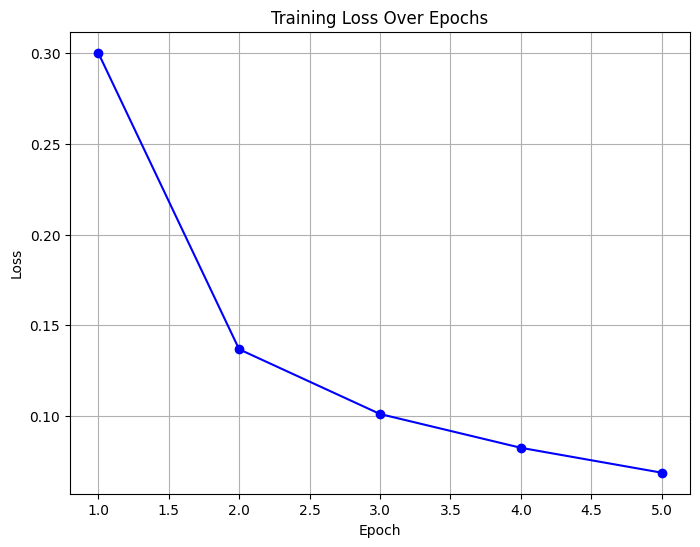

In [38]:
# TODO: Record the loss values and plot them
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


<a name="task4"></a>

### Task 4: Evaluate the MLP Model (10 points)
#### a. Evaluate the trained MLP model on the test dataset. (5 points)

In [39]:
# TODO: Implement the evaluation code
mlp_model.eval()
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation for evaluation
    for data, target in test_loader:
        # Forward pass
        outputs = mlp_model(data)

        # Get predicted class (index of maximum logit)
        _, predicted = torch.max(outputs, 1)

        # Update total and correct counts
        total += target.size(0)  # Total number of samples
        correct += (predicted == target).sum().item()  # Correct predictions

# Calculate and print the accuracy
accuracy = 100 * correct / total


In [40]:
accuracy

97.72

#### b. Report the test accuracy. (5 points)

**Answer:** The accuracy of the MLP on the test images is **97.72%**.


<a name="task5"></a>

### Task 5: Build a CNN Model (20 points)
#### a. Define a CNN class with the specified architecture. (15 points)
The CNN should have:
- Two convolutional layers:
-- First layer: 1 input channel, 32 output channels, kernel size 3, padding 1.
-- Second layer: 32 input channels, 64 output channels, kernel size 3, padding 1.
- A max pooling layer after each convolutional layer.
- Two fully connected layers:
-- First layer: inputs matching the flattened output from conv layers, 128 neurons.
-- Second layer: 128 neurons, 10 output neurons.

In [41]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # TODO: Define the convolutional and fully connected layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


#### b. Explain the role of convolutional layers in CNNs. (5 points)

# **Answer:** They extract features from the input images


<a name="task6"></a>

### Task 6: Train the CNN Model (15 points)
### a. Write the training loop for the CNN model. (10 points)
- Use the Adam optimizer and CrossEntropyLoss.
- Train for 5 epochs.

In [42]:
# Instantiate the model, define the loss function and the optimizer
cnn_model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = cnn_model(data)

        # Compute the loss
        loss = criterion(outputs, target)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Average loss for the epoch
    avg_loss = running_loss / len(train_loader)

#### b. Plot the training loss over epochs. (5 points)

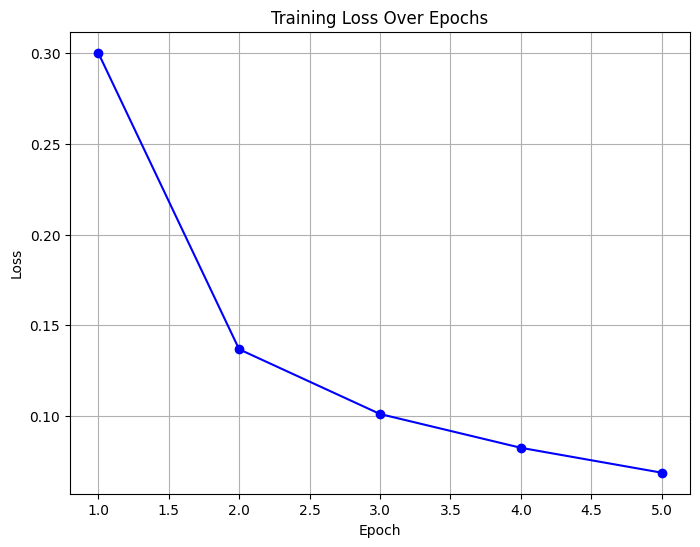

In [43]:
# TODO: Record the loss values and plot them
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


<a name="task7"></a>

### Task 7: Evaluate the CNN Model (10 points)
#### a. Evaluate the trained CNN model on the test dataset. (5 points)

In [44]:
# TODO: Implement the evaluation code
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = cnn_model(data)

        _, predicted = torch.max(outputs, 1)

        total += target.size(0)
        correct += (predicted == target).sum().item()


In [45]:
100 * correct / total

98.97

#### b. Report the test accuracy. (5 points)

**Answer:** The accuracy of the CNN on the test images is **98.97%**.


<a name="submission"></a>

### 4. Submission Guidelines
Submit your completed notebook in .ipynb format on private channel on Mattermost.
- Ensure all code cells are executed and outputs are visible.
- Provide answers to all questions in the markdown cells.
- Include any plots or visualizations you generated.